# **Aim:** To predict emotions from a text using Neural Networks

## EDA

### Importing Header Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string
from wordcloud import WordCloud,STOPWORDS
import tensorflow as tf
from tensorflow import keras
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pickle
filterwarnings("ignore")

2022-04-19 09:15:00.556817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-19 09:15:00.556856: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Initializing Dataset

In [2]:
df = pd.read_csv("/home/jt/Python/Research/preds/training.csv")

In [3]:
df.drop("Unnamed: 0",axis = 1, inplace = True)

In [4]:
# Finding length of each tweet
df["Length"] = df["Tweet"].str.len()

In [5]:
df1 = df[df["Emotion"] == "Joy"]
df2 = df[df["Emotion"] == "Surprise"]
df3 = df[df["Emotion"] == "Fear"]
df4 = df[df["Emotion"] == "Sadness"]
df5 = df[df["Emotion"] == "Anger"]
df6 = df[df["Emotion"] == "Disgust"]

In [6]:
df

,Tweet,Emotion,Length
0,Vet VeChain Vefam start voting #BTC #cryptocur...,Surprise,51
1,Cryptocurrencies are going to disappoint all t...,Joy,257
2,@TheRealGeigs Yes I did I think BTC going for ...,Joy,118
3,Sunday #crypto charting Any frens wanna share ...,Joy,213
4,"Petty invectives against wasabi aside, this is...",Fear,142
...,...,...,...
20685,@HoppersGame @Avalanche_Space @apa_nft @avalan...,Joy,181
20686,@80sCruiser been thinking about moving most of...,Sadness,93
20687,@Louverture_fi 0.13 AVAX fee?! Really?,Sadness,38
20688,#Avalanche Stats #AVAX Price $ 70.57 CMC Rank...,Joy,183


### Visualizing Counts of Each Class

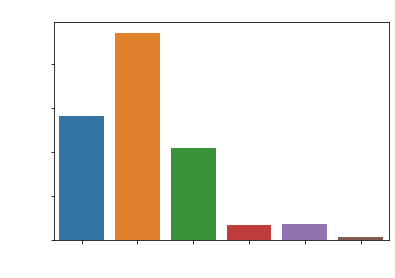

In [7]:
fig = plt.figure()
plt.title("Bargraph of Emotion and Their count",color = "White")
sns.countplot(df['Emotion'])
plt.xlabel("Emotion",color = "white")
plt.ylabel("Counts",color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.show()

<Figure size 432x288 with 0 Axes>

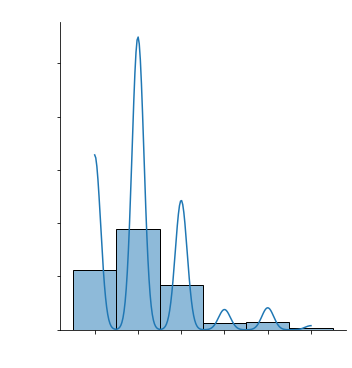

In [8]:
fig = plt.figure()
sns.displot(df['Emotion'],kde=True)
plt.title("Histogram of Emotion and Their count",color = "White")
plt.xlabel("Emotion",color = "white")
plt.ylabel("Counts",color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.show()

### Plotting Wordcloud

In [9]:
li = [df1,df2,df3,df4,df5,df6] #Declared a list to iterate over dataframes

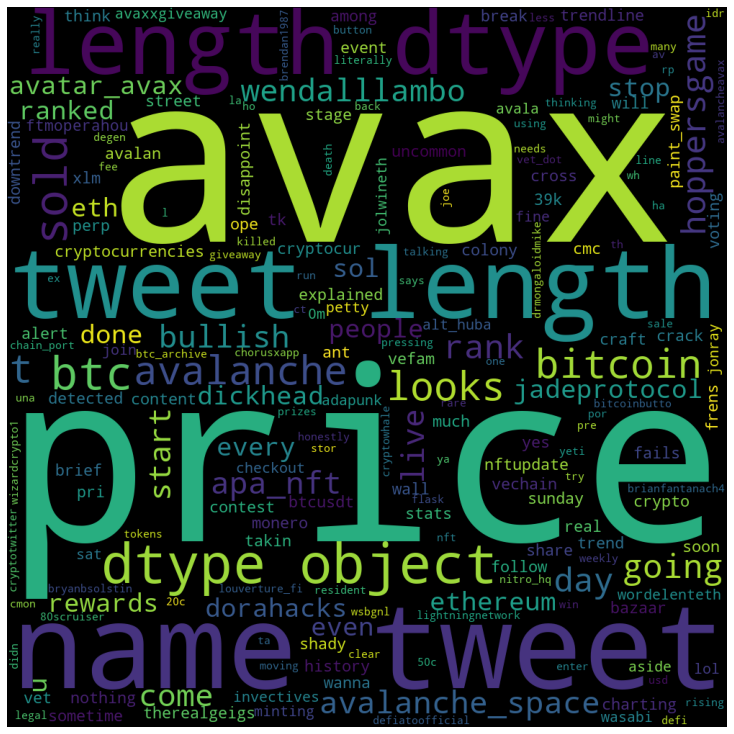

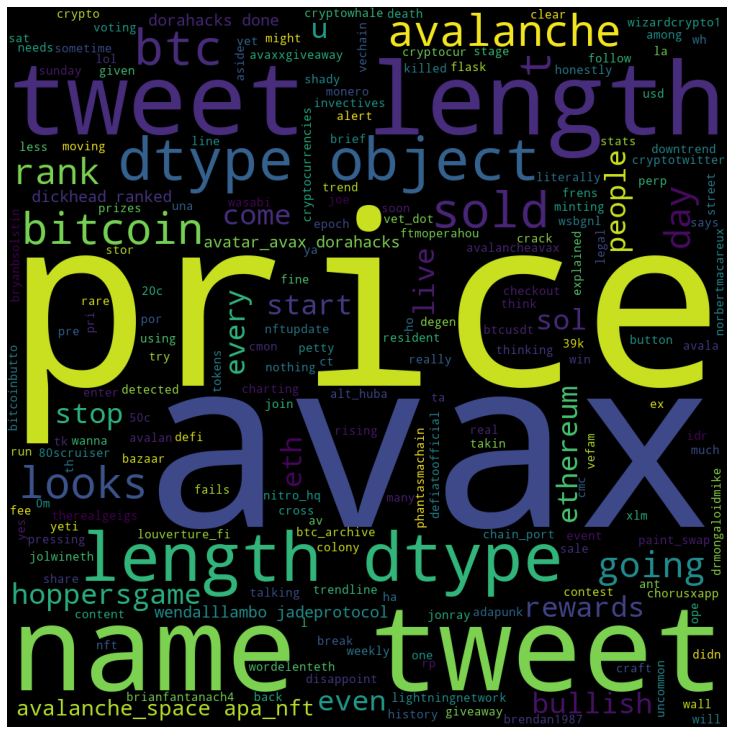

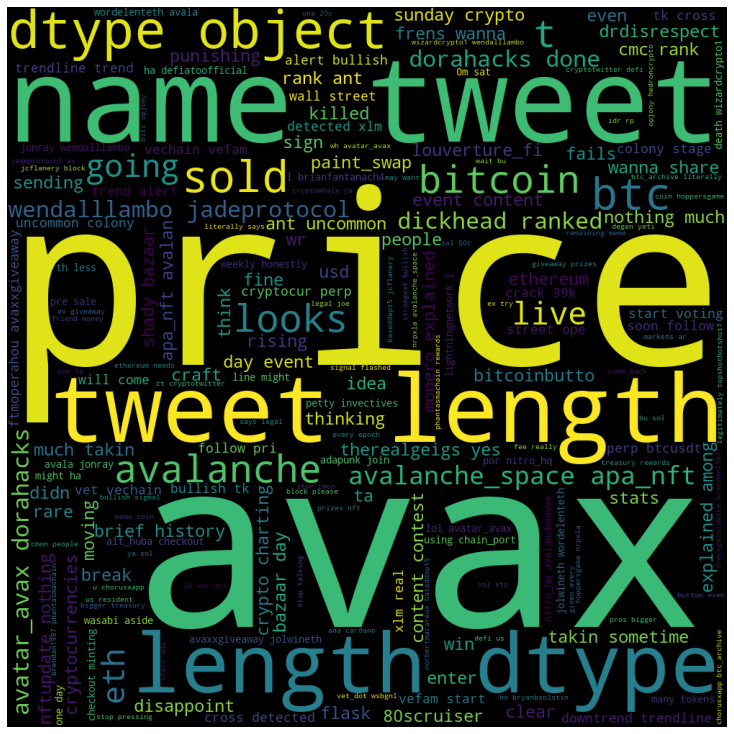

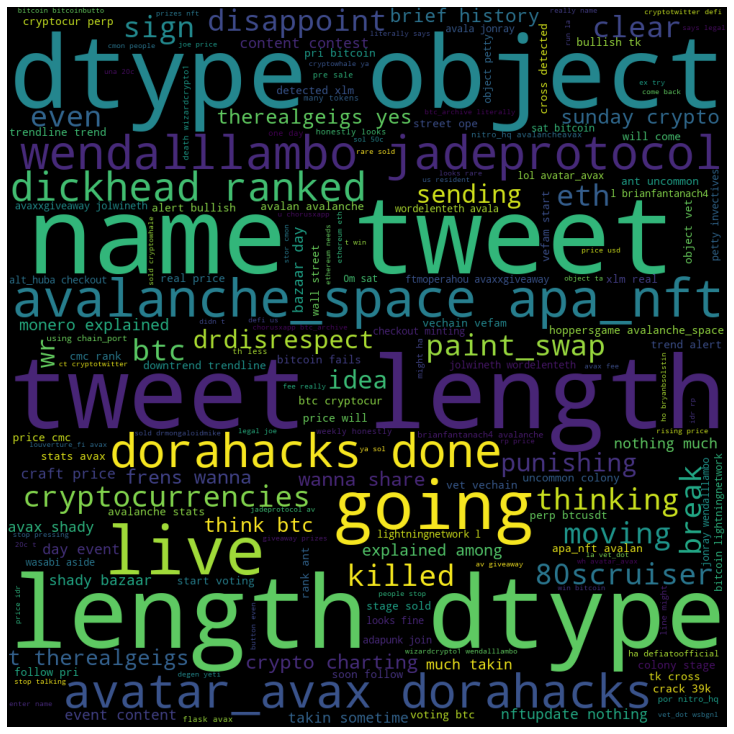

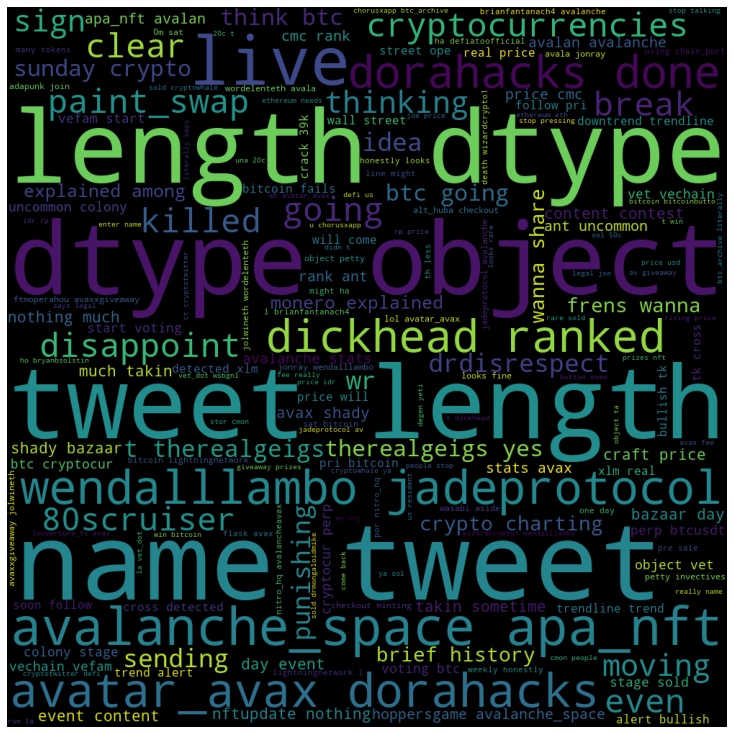

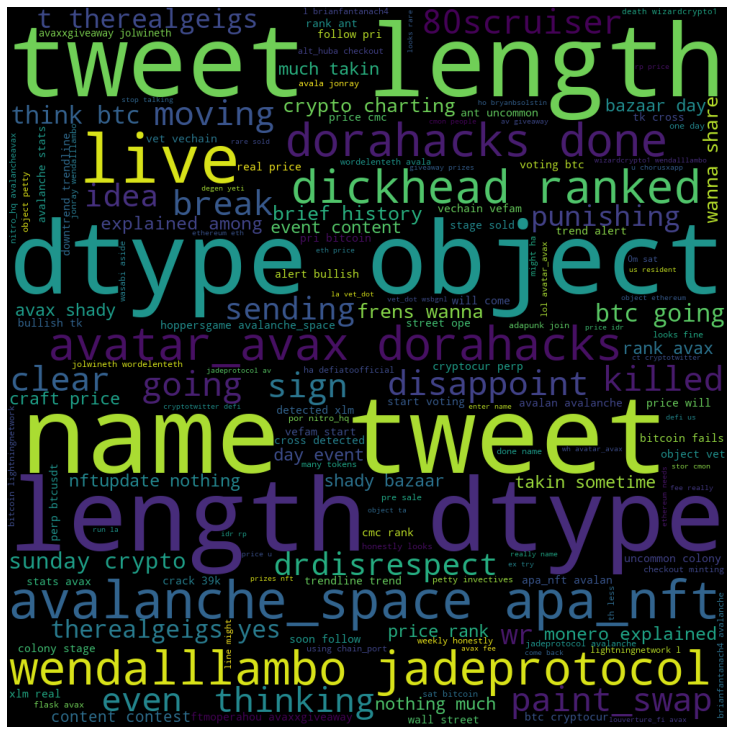

In [10]:
comment_words = ''
stopwords = set(STOPWORDS)
for i in range(6):
    for data in li:
        val = data["Tweet"]
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1000, height = 1000,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

## Initializing Dataset For Neural Network

### Preparing Dataset For The Model (Data Preprocessing)

In [ ]:
# Removing "#" and "@" 
def clean_tweet(i):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            i = i.replace(separator,' ')
    words = []
    for word in i.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [ ]:
for i in range(0,len(df)):
    df["Tweet"][i] = clean_tweet(df["Tweet"][i])

In [ ]:
# Stemming The Dataset using PorterStemer and making a corpus
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df['Tweet'] = df['Tweet'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus =df["Tweet"].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))


In [ ]:
# Steming every word using SnowballStemmer. 
stemmer = SnowballStemmer("english")
df["Tweet"] = df["Tweet"].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [ ]:
#Vectorizing The Corpus
cv = CountVectorizer()
words_vectorized = cv.fit_transform(corpus).toarray()

In [ ]:
#Encoding the Emotions
le = preprocessing.LabelEncoder()
emotions =le.fit_transform(df["Emotion"])

In [ ]:
# Splitting Dataset into 17690:3000 i.e 17690 for training and 3000 for testing
(X_train, y_train) =  words_vectorized[:17690],emotions[:17690]
(X_test, y_test)  = words_vectorized[17690:],emotions[17690:]

In [ ]:
print("Length of X_train:",len(X_train))
print("Length of X_test:",len(X_test))
print("Length of y_train:",len(y_train))
print("Length of y_test:",len(y_test))

### Using Keras.Sequential Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(17903,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=128)

In [ ]:
#Saving the neural network
pickle.dump(model,open("EmotionNeuralNetwork.sav","wb"))
model.save("EmotionNeuralNetwork")